In [1]:
import pandas as pd
from chemtbd.io import Agilent

In [2]:
agi = Agilent.from_root('data/test3')

In [3]:
tic = agi['FA14.D'].results.tic
lib = agi['FA14.D'].results.lib
fid = agi['FA14.D'].results.fid

In [4]:
def find_match(x, Y):
    ''' find index of argmin lambda(x,Y)
    '''
    score = lambda y: (x - y)**2
    return Y.apply(score).idxmin()

def rt_match(lib_row, rt):
    ''' find closest rt
    '''
    x, i = lib_row.rt, lib_row.name
    return find_match(x, rt[i:])

In [16]:
xi = lib.apply(rt_match, rt=tic.rt.sort_values(), axis=1)
lib['tic_area'] = tic.area[xi].values
lib['tic_rt'] = tic.rt[xi].values

xi = lib.apply(rt_match, rt=fid.rt.sort_values(), axis=1)
print(xi)
lib['fid_area'] = fid.area[xi].values
lib['fid_rt'] = fid.rt[xi].values

0    5
1    5
2    3
3    2
dtype: int64


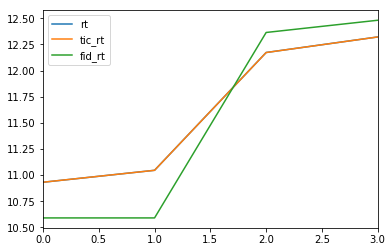

In [6]:
%matplotlib inline
lib[['rt', 'tic_rt', 'fid_rt']].plot()

In [12]:
lib[['rt', 'tic_rt', 'fid_rt']]

,rt,tic_rt,fid_rt
0,10.9317,10.932,10.59051
1,11.0462,11.046,10.59051
2,12.1734,12.173,12.36496
3,12.3222,12.322,12.48198


In [111]:
import numpy as np

def score(x, Y):
    return np.argmin((x - Y)**2)

def min_rt_pairs(xx, yy):
    '''
    '''
    print('all xx', xx)
    print('al yy', yy)
    sorted_ix = np.argsort(xx)
    sorted_yy = np.sort(yy)
    
    arg_min_iy = 0
    arg_min_iys = []
    
    for ix in sorted_ix:
        iy = arg_min_iy
        print('x', xx[ix])
        arg_min_iy = iy + score(xx[ix], sorted_yy)
        print('match', sorted_yy[arg_min_iy])    
        arg_min_iys.append(arg_min_iy)
            
    print('final index', arg_min_iys)
    return sorted_yy[arg_min_iys]

In [112]:
min_rt_pairs(lib.rt.values, fid.rt.values)

all xx [ 10.9317  11.0462  12.1734  12.3222]
al yy [ 12.66993  10.16676  12.48198  12.36496  13.63668  10.59051  13.92386]
x 10.9317
match 10.59051
x 11.0462
match 12.36496
x 12.1734
match 12.66993
x 12.3222
match 13.92386
final index [1, 2, 4, 6]


array([ 10.59051,  12.36496,  12.66993,  13.92386])